# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
baseline_scores = []

for i in range(100):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            baseline_scores.append(score)
            break
    
print("Score: mean = {}, std = {:.2f}".format(np.mean(baseline_scores), np.std(baseline_scores)))

Score: mean = -0.2, std = 1.20


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
# Implementation of Deep Q-Learning - adapted from DQN Agent code

from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent
import torch

env_info = env.reset(train_mode=True)[brain_name]
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train_mode = True, checkpoint_path='checkpoints/checkpoint.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    score_window_length = 100
    scores_window = deque(maxlen=score_window_length)   # last x scores
    
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state   
        score = 0
        for t in range(max_t):
            
            
            action = agent.act(state, eps)        # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % score_window_length == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        # end the loop and save agent if it meets the win condition
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_path)
            break
    torch.save(agent.qnetwork_local.state_dict(), checkpoint_path)
    return scores

def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def plot_scores(scores,plot_title):
    moving_average_scores = moving_average(scores,10)
    plt.plot(scores,label='scores')
    plt.plot(range(10,len(scores)+1),moving_average_scores,label='moving average')
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.legend(loc='upper left')
    plt.title(plot_title)
    plt.show()


Episode 5	Average Score: 0.00

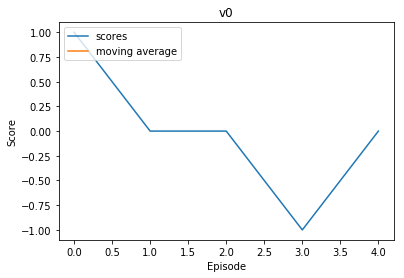

In [9]:
# Run and plot results (v0, just to check functions)
scores = dqn(n_episodes=5,eps_decay=0.99,eps_end=0.02,checkpoint_path='v0.pth')
plot_scores(scores,'v0')


Episode 100	Average Score: -0.27
Episode 200	Average Score: 2.561
Episode 300	Average Score: 7.62
Episode 400	Average Score: 10.08
Episode 490	Average Score: 13.08
Environment solved in 490 episodes!	Average Score: 13.08


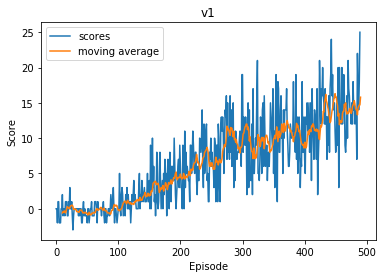

Score: mean = 13.08, std = 4.66


In [10]:
# Run and plot results (v1)
scores = dqn(n_episodes=500,eps_decay=0.99,eps_end=0.02,checkpoint_path='v1.pth')
plot_scores(scores,'v1')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 100	Average Score: 4.18
Episode 200	Average Score: 10.58
Episode 299	Average Score: 13.02
Environment solved in 299 episodes!	Average Score: 13.02


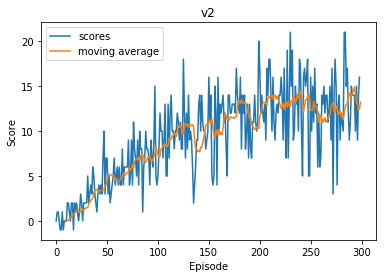

Score: mean = 13.02, std = 3.85


In [11]:
# Run and plot results (v2)
scores = dqn(n_episodes=500,eps_decay=0.99,eps_end=0.05,checkpoint_path='v2.pth')
plot_scores(scores,'v2')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 100	Average Score: 4.10
Episode 200	Average Score: 9.51
Episode 300	Average Score: 12.73
Episode 309	Average Score: 13.01
Environment solved in 309 episodes!	Average Score: 13.01


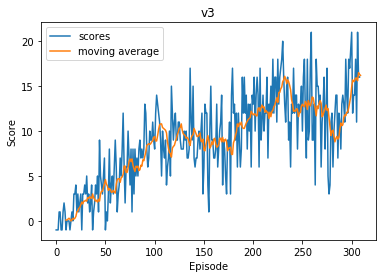

Score: mean = 13.01, std = 3.88


In [12]:
# Run and plot results (v3)
scores = dqn(n_episodes=500,eps_decay=0.99,eps_end=0.08,checkpoint_path='v3.pth')
plot_scores(scores,'v3')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 100	Average Score: 2.24
Episode 200	Average Score: 7.55
Episode 300	Average Score: 10.50
Episode 400	Average Score: 11.67
Episode 477	Average Score: 13.04
Environment solved in 477 episodes!	Average Score: 13.04


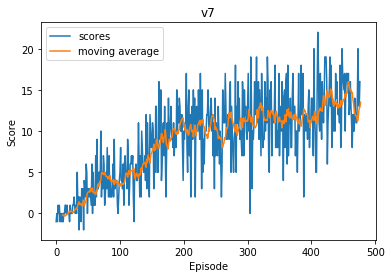

Score: mean = 13.04, std = 3.74


In [7]:
# Run and plot results (v7)
scores = dqn(n_episodes=500,eps_decay=0.99,eps_end=0.11,checkpoint_path='v7.pth')
plot_scores(scores,'v7')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 100	Average Score: 4.46
Episode 200	Average Score: 11.17
Episode 243	Average Score: 13.01
Environment solved in 243 episodes!	Average Score: 13.01


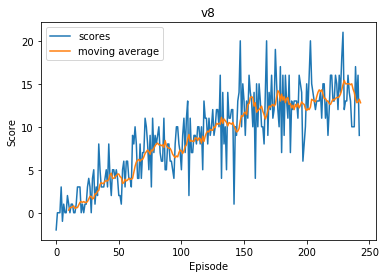

Score: mean = 13.01, std = 3.08


In [8]:
# Run and plot results (v8)
scores = dqn(n_episodes=500,eps_decay=0.99,eps_end=0.13,checkpoint_path='v8.pth')
plot_scores(scores,'v8')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 100	Average Score: 12.71
Episode 102	Average Score: 13.02
Environment solved in 102 episodes!	Average Score: 13.02


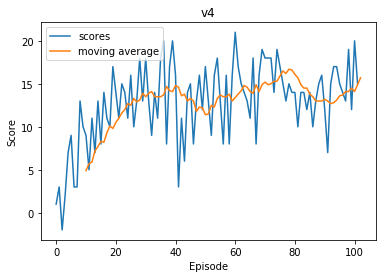

Score: mean = 13.02, std = 4.37


In [13]:
# Run and plot results (v4)
scores = dqn(n_episodes=500,eps_decay=0.90,eps_end=0.05,checkpoint_path='v4.pth')
plot_scores(scores,'v4')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 52	Average Score: 13.17
Environment solved in 52 episodes!	Average Score: 13.17


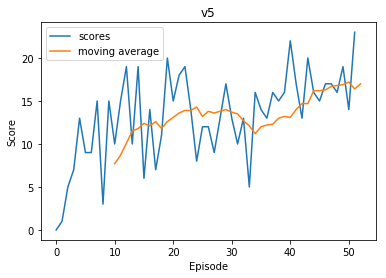

Score: mean = 13.173076923076923, std = 5.10


In [14]:
# Run and plot results (v5)
scores = dqn(n_episodes=500,eps_decay=0.80,eps_end=0.05,checkpoint_path='v5.pth')
plot_scores(scores,'v5')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))

Episode 22	Average Score: 13.00
Environment solved in 22 episodes!	Average Score: 13.00


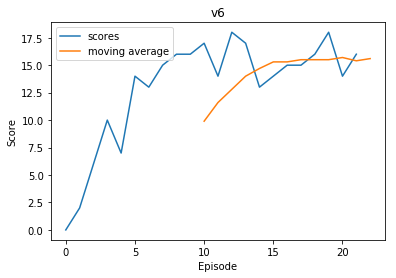

Score: mean = 13.0, std = 4.85


In [15]:
# Run and plot results (v6)
scores = dqn(n_episodes=500,eps_decay=0.70,eps_end=0.05,checkpoint_path='v6.pth')
plot_scores(scores,'v6')

print("Score: mean = {}, std = {:.2f}".format(np.mean(scores[-100:]), np.std(scores[-100:])))